In [61]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import warnings
warnings.filterwarnings('ignore')

In [2]:

data = pd.read_csv('C://Users//Bhavya N//1_Practice_DataScience//Clustering//Gene_dataset//data.csv')
labels=pd.read_csv('C://Users//Bhavya N//1_Practice_DataScience//Clustering//Gene_dataset//labels.csv')

In [3]:

df = pd.concat([data, labels.iloc[:,1]], axis=1)


In [4]:
df.isnull().sum().sum() # Therfore there are no null values in the data set 

0

In [5]:


df['Class'] = pd.Categorical(df['Class'], categories=df['Class'].unique()).codes

df['Class'].unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [6]:
df1=df.drop('Unnamed: 0',axis=1)
df1

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,1
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,2
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,1
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,4
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,0


In [7]:
df2 = StandardScaler().fit_transform(df1.iloc[:,:-1].astype(np.float))



In [8]:
dd=pd.DataFrame(df2)


In [9]:
# after rescaling the data 
df1= pd.concat([dd, df1.iloc[:,-1]], axis=1)
df1

,0,1,2,3,4,5,6,7,8,9,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,Class
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901,0
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901,1
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901,0
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901,0
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.194799,-0.954328,-0.354155,0.983356,0.380054,0.0,-0.578502,-0.005819,-0.125376,-0.065633,...,0.584642,-0.135605,-0.152573,-0.238559,0.431432,-0.589804,0.890943,1.587933,-0.261901,2
797,-0.194799,0.776655,1.275624,-0.588497,0.480533,0.0,-0.076907,-0.983088,-0.125376,-0.065633,...,1.422436,-0.612944,0.717105,-1.270672,-0.162408,0.279202,-1.499107,1.993137,-0.261901,1
798,-0.194799,0.198881,0.574816,2.292529,-0.611452,0.0,0.118352,2.578699,-0.125376,-0.065633,...,-0.257444,1.132504,-0.528281,-0.733465,0.654847,0.906442,-0.220082,-0.410467,1.348558,4
799,-0.194799,-0.350453,-0.288632,0.934054,0.342783,0.0,1.632398,-0.983088,-0.125376,-0.065633,...,-0.266264,2.502171,-0.042767,-0.216665,-0.811922,0.310652,1.437193,0.091951,-0.261901,0


## EDA

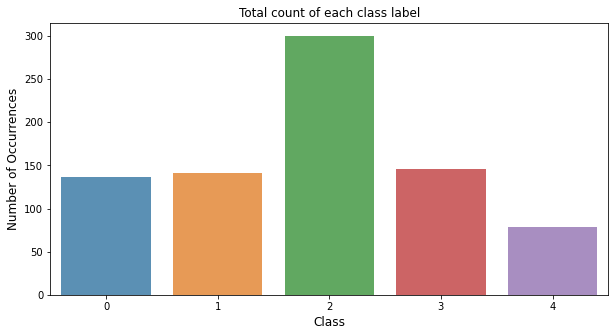

In [10]:
#Imbalanced data
Outcome_count  = df['Class'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(Outcome_count.index, Outcome_count.values, alpha=0.8)
plt.title('Total count of each class label')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

In [11]:
#df.corr()
#x_tr

In [12]:
x_tr, x_te, y_tr, y_te = train_test_split(df1.iloc[:,:-1],  df1.iloc[:,-1], test_size=30, random_state=6)

kmeans = KMeans(n_clusters=5).fit(x_tr,y_tr)

pred=kmeans.predict(x_te)

pred


array([3, 3, 4, 2, 2, 4, 3, 4, 1, 1, 4, 4, 3, 1, 1, 4, 2, 1, 3, 3, 3, 3,
       4, 1, 0, 2, 3, 2, 1, 3])

In [13]:
from sklearn.metrics import precision_recall_curve,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
cm = confusion_matrix(pred,y_te)
Auc= accuracy_score(pred,y_te)

print('Confusion matrix is   ')
print(cm)
print('Accuracy score  is {0} \n '.format(Auc))


Confusion matrix is   
[[0 0 0 0 1]
 [7 0 0 0 0]
 [0 0 0 5 0]
 [0 6 3 0 1]
 [0 0 7 0 0]]
Accuracy score  is 0.0 
 


In [14]:
# so using PCA we are trying to improve performance

In [15]:

pca = PCA(n_components=2)
principal_component = pca.fit_transform(df1.iloc[:,:-1])

In [16]:
principal_df = pd.DataFrame(data=principal_component, columns=['Principal Component 1', 'Principal Component 2'])

In [17]:

principal_df.head()

,Principal Component 1,Principal Component 2
0,-57.446987,95.410981
1,-16.919430,0.732470
2,-70.345218,-19.303327
3,-49.161592,-9.227587
4,-18.132534,-51.327797


In [18]:
concat_df = pd.concat([principal_df, df['Class']], axis=1)

In [19]:
concat_df.head()


,Principal Component 1,Principal Component 2,Class
0,-57.446987,95.410981,0
1,-16.919430,0.732470,1
2,-70.345218,-19.303327,0
3,-49.161592,-9.227587,0
4,-18.132534,-51.327797,2


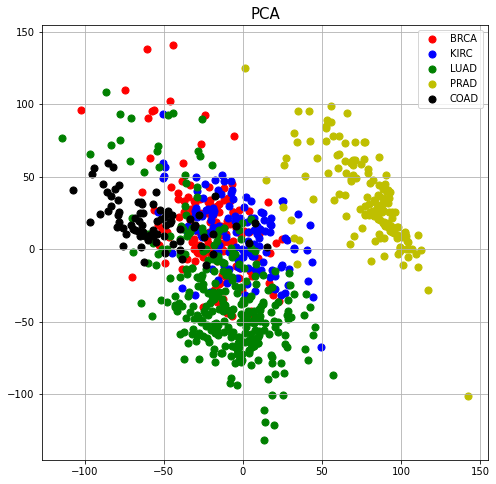

In [20]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA', fontsize=15)
labels_list = [0,1,2,3,4]#
lable=['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list, colors):
    indices = concat_df['Class'] == lab
    ax.scatter(concat_df.loc[indices, 'Principal Component 1'],
              concat_df.loc[indices, 'Principal Component 2'], 
              c = color,
              s = 50)
    ax.legend(lable)
    ax.grid()

### 1.2 t-SNE (t-distributed Stochastic Neighbor Embedding)

In [21]:
tsne = TSNE(n_components=2, random_state=0)
tsne_rnaexp = tsne.fit_transform(df1.iloc[:,:-1])

In [22]:
tsne_df = pd.DataFrame(data=tsne_rnaexp, columns=['tsne 1', 'tsne 2'])

In [23]:
tsne_df.head()

,tsne 1,tsne 2
0,11.647285,-22.223541
1,-11.153162,-2.936570
2,5.872204,-35.349770
3,12.503694,-32.844971
4,19.097918,6.363716


In [24]:
tsne_concat_df = pd.concat([tsne_df, df1['Class']], axis=1)

In [25]:
tsne_concat_df.head()

,tsne 1,tsne 2,Class
0,11.647285,-22.223541,0
1,-11.153162,-2.936570,1
2,5.872204,-35.349770,0
3,12.503694,-32.844971,0
4,19.097918,6.363716,2


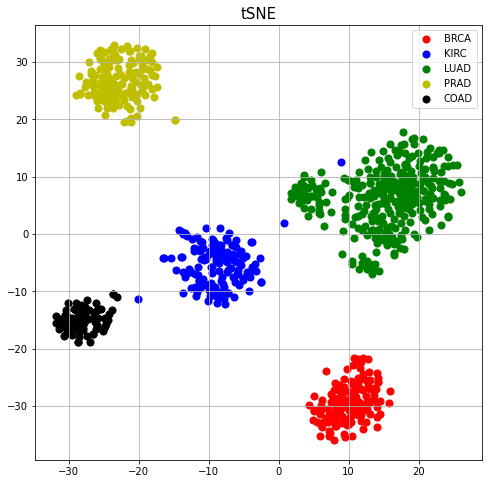

In [26]:
fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.set_title('tSNE', fontsize=15)
labels_list_2 = [0,1,2,3,4]#['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
lable=['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors_2 = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list_2, colors_2):
    indices_2 = tsne_concat_df['Class'] == lab
    ax_2.scatter(tsne_concat_df.loc[indices_2, 'tsne 1'],
              tsne_concat_df.loc[indices_2, 'tsne 2'], 
              c = color,
              s = 50)
    ax_2.legend(lable)
    ax_2.grid()

In [27]:
X=np.array(tsne_concat_df.iloc[:,:-1])
y=np.array(tsne_concat_df.iloc[:,-1])


In [28]:

#x_tr, x_te, y_tr, y_te = train_test_split(tsne_concat_df.iloc[:,:-1],  tsne_concat_df.iloc[:,-1], test_size=0.30, random_state=6)

#kmeans = KMeans(n_clusters=5).fit(tsne_concat_df)

kmeans = kmeans = KMeans(n_clusters=5, max_iter=100, algorithm = 'full', random_state=49904670)
kmeans.fit(X)

pred=kmeans.predict(X)

correct = 0
for i in range(len(pred)):
    
    if pred[i] == y[i]:
        
        correct += 1

print(correct/len(X))
correct



0.1735330836454432


139

In [29]:

cm = confusion_matrix(pred,y)
Auc= accuracy_score(pred,y)

print('Confusion matrix is   ')
print(cm)
print('Accuracy score  is {0} \n '.format(Auc))


Confusion matrix is   
[[  0   1 300   0   0]
 [  0 139   0   0   0]
 [  0   0   0 146   0]
 [  0   1   0   0  78]
 [136   0   0   0   0]]
Accuracy score  is 0.1735330836454432 
 


## Classifiction techniques 

#### Logistic regression 

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(x_tr,y_tr)

lg_pred=log_reg.predict(x_te)
lg_cm = confusion_matrix(lg_pred,y_te)
lg_Auc= accuracy_score(lg_pred,y_te)

print('Confusion matrix is   ')
print(lg_cm)
print('Accuracy score  is {0} \n '.format(lg_Auc))

Confusion matrix is   
[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  2]]
Accuracy score  is 1.0 
 


In [31]:
knn = KNeighborsClassifier().fit(x_tr,y_tr)
knn_pred=knn.predict(x_te)
knn_cm = confusion_matrix(knn_pred,y_te)
knn_Auc= accuracy_score(knn_pred,y_te)

print('Confusion matrix is   ')
print(knn_cm)
print('Accuracy score  is {0} \n '.format(knn_Auc))

Confusion matrix is   
[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  2]]
Accuracy score  is 1.0 
 


In [32]:
knn.score(x_tr, y_tr), knn.score(x_te, y_te)

(0.9974059662775616, 1.0)

In [33]:
svm = SVC().fit(x_tr,y_tr)
svm_pred=knn.predict(x_te)
svm_cm = confusion_matrix(svm_pred,y_te)
svm_Auc= accuracy_score(svm_pred,y_te)

print('Confusion matrix is   ')
print(svm_cm)
print('Accuracy score  is {0} \n '.format(svm_Auc))

Confusion matrix is   
[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  2]]
Accuracy score  is 1.0 
 


The metrics for validating the clustering results 

In [64]:
X1=tsne_concat_df.iloc[:,:-1]
y1=tsne_concat_df.iloc[:,-1]

In [65]:
def  get_kmeans ( data ,  n_clusters = 3 ): 
    
    kmeans  = KMeans(n_clusters=n_clusters, max_iter=300,  n_init = 10 ,algorithm = 'full', random_state=49904670)
    kmeans.fit(data)
   
    y_pred  =  kmeans .predict(data)
  
    data['cluster']  =  y_pred 
    
    return  data ,  kmeans . inertia_

In [94]:
kmeans  =  [] 
elbow  =  [] 
calinskis  =  [] 
silhouettes  =  [] 
number_clusters  =  []

for  i  in  range ( 15 ): 
    temp1 ,  temp2  =  get_kmeans ( X1 ,  i + 2 ) 
    kmeans . append ( X1 . merge ( temp1 [ 'cluster' ])) 
    elbow . append ( temp2 ) 
    
    print ( 'calinski_harabasz_score {0},\
    silhouette_score{1},\
    cluster {2}' .\
           format(metrics . calinski_harabasz_score (X1 , temp1['cluster']), \
           metrics. silhouette_score ( X1 , temp1['cluster']),  ( i + 2 )) )
    calinskis . append ( metrics . calinski_harabasz_score ( X1 ,  temp1 [ 'cluster' ])) 
    silhouettes . append ( metrics . silhouette_score ( X1 ,  temp1 [ 'cluster' ])) 
    number_clusters . append ( i + 2) 


calinski_harabasz_score 639.3708717011875,    silhouette_score0.44293769047806747,    cluster 2
calinski_harabasz_score 1051.4099132333606,    silhouette_score0.5788899180549473,    cluster 3
calinski_harabasz_score 2477.567351995323,    silhouette_score0.7177428106855431,    cluster 4
calinski_harabasz_score 3577.0881095451705,    silhouette_score0.7302762280815661,    cluster 5
calinski_harabasz_score 4169.900159952672,    silhouette_score0.6607861139354194,    cluster 6
calinski_harabasz_score 4428.867972627203,    silhouette_score0.6686186561768237,    cluster 7
calinski_harabasz_score 4204.394295050413,    silhouette_score0.6657752230475142,    cluster 8
calinski_harabasz_score 4055.4128504257174,    silhouette_score0.614944686729855,    cluster 9
calinski_harabasz_score 4011.0038165019523,    silhouette_score0.5901529054017778,    cluster 10
calinski_harabasz_score 4047.9027423180673,    silhouette_score0.5448827713559493,    cluster 11
calinski_harabasz_score 4167.180874400815, 

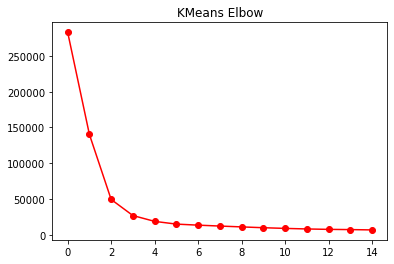

In [95]:
plt . plot ( elbow , 'ro-' ,  label = "Elbow" ) 
plt . title ( "KMeans Elbow" ) 
plt . show () 
kmean , temp  =  get_kmeans ( X1 ) 
kmean  =  X1 . merge ( kmean [ 'cluster' ])

According to  Calinski Harabasz  Score the higher  the score the cluster is  best , Therefore 7 clusters are best 


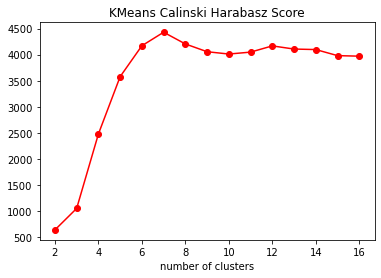

In [92]:
print("According to  Calinski Harabasz  Score the higher  the score the cluster is  best , Therefore 7 clusters are best ")
plt . plot ( number_clusters ,  calinskis ,  'ro-' ,  label = "KMeans Ralinski Harabasz Score" ) 
plt . title ( "KMeans Calinski Harabasz Score" ) 
plt . xlabel ( "number of clusters" ) 
plt . show ()

The Silhouette Score which is near to 1 is best , Therefore 5 clusters are best 


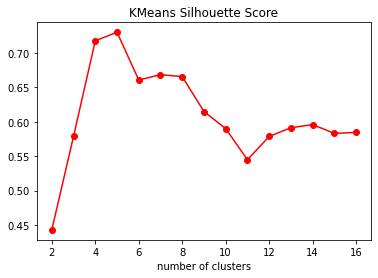

In [91]:
print("The Silhouette Score which is near to 1 is best , Therefore 5 clusters are best ")
plt . plot ( number_clusters ,  silhouettes , 'ro-' ,  label = "KMeans Silhouette Score" ) 
plt . title ( "KMeans Silhouette Score" ) 
plt . xlabel ( "number of clusters" ) 
plt . show ()

Achieved 100 % Accuracy using classification techniques 